### READING THE DATASET


In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/FlorianMuehlbauer24/Midterm_Airline_Satisfaction/19bec508b94c864d278ffcab56db7e6f695a2feb/df_airline.csv')

In [2]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [3]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [4]:
df.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

### DATA WRANGLING

In [5]:
# standarlizing all column names
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')

In [6]:
# Filter only for business
selected_values = ['Business']
condition = df['class'].isin(selected_values)

df = df[condition].copy()


### ENCODING

In [7]:
df = df.dropna()

In [8]:
df = df.drop_duplicates()

In [9]:
df.columns

Index(['unnamed:_0', 'id', 'gender', 'customer_type', 'age', 'type_of_travel',
       'class', 'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [10]:
df = df[['customer_type', 'age', 'gender', 'flight_distance', 'type_of_travel','online_boarding','satisfaction']]

In [11]:
df.shape

(49533, 7)

In [12]:
# Reset index
df = df.reset_index()

In [13]:
# Create Categorical and Numercial DF
categorical_df = df.select_dtypes(include='object')
numerical_df = df.select_dtypes(include ='number')

In [14]:
# Check categorical df
categorical_df.head()

,customer_type,gender,type_of_travel,satisfaction
0,disloyal Customer,Male,Business travel,neutral or dissatisfied
1,Loyal Customer,Female,Business travel,satisfied
2,Loyal Customer,Female,Business travel,neutral or dissatisfied
3,Loyal Customer,Male,Business travel,satisfied
4,Loyal Customer,Female,Business travel,satisfied


In [15]:
# Check numberical df
numerical_df.head()

,index,age,flight_distance,online_boarding
0,1,25,235,3
1,2,26,1142,5
2,3,25,562,2
3,4,61,214,5
4,7,52,2035,5


In [16]:
# Translate categorical_df into numerical values
categorical_df = pd.get_dummies(categorical_df[['gender','customer_type','type_of_travel','satisfaction']], dtype=int)

In [17]:
# Check modified categorical_df with numerical values
# print(categorical_df.head)

In [18]:
df_combined = pd.concat([categorical_df, numerical_df], axis=1)

In [19]:
df_combined.nunique()

gender_Female                               2
gender_Male                                 2
customer_type_Loyal Customer                2
customer_type_disloyal Customer             2
type_of_travel_Business travel              2
type_of_travel_Personal Travel              2
satisfaction_neutral or dissatisfied        2
satisfaction_satisfied                      2
index                                   49533
age                                        75
flight_distance                          3585
online_boarding                             6
dtype: int64

In [20]:
df_combined = df_combined.drop(['satisfaction_neutral or dissatisfied'], axis=1)

In [21]:
# df_combined.head()

In [22]:
df_combined.shape

(49533, 11)

In [23]:
df_combined['satisfaction_satisfied'].unique()

array([0, 1])

In [24]:
df_combined.columns

Index(['gender_Female', 'gender_Male', 'customer_type_Loyal Customer',
       'customer_type_disloyal Customer', 'type_of_travel_Business travel',
       'type_of_travel_Personal Travel', 'satisfaction_satisfied', 'index',
       'age', 'flight_distance', 'online_boarding'],
      dtype='object')

In [25]:
# Analyzing the proporction of unique values of the target variable
df_combined['satisfaction_satisfied'].value_counts()

1    34390
0    15143
Name: satisfaction_satisfied, dtype: int64

In [26]:
# Appying a combination of oversampling and undersampling techniques to the dataset.
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [27]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### SPLIT

In [28]:
X = df_combined.drop(columns = ["satisfaction_satisfied"]) # everything but y variable
y = df_combined[["satisfaction_satisfied"]]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 100)

### RESTORING BALANCE IN TARGET V

In [29]:
# Apply SMOTEENN to combine oversampling and undersampling on the training set
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

### ANALYZING SKEWNESS IN DATASET

In [30]:
X.columns

Index(['gender_Female', 'gender_Male', 'customer_type_Loyal Customer',
       'customer_type_disloyal Customer', 'type_of_travel_Business travel',
       'type_of_travel_Personal Travel', 'index', 'age', 'flight_distance',
       'online_boarding'],
      dtype='object')

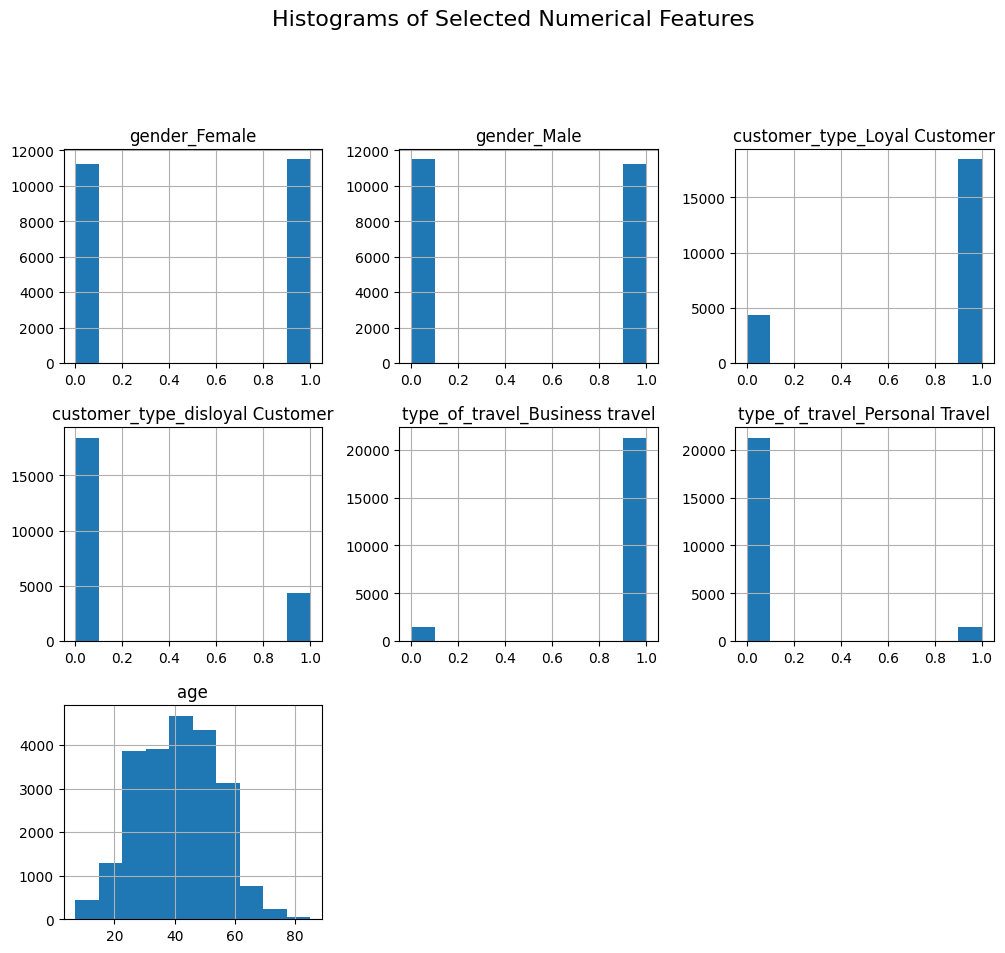

In [31]:
import matplotlib.pyplot as plt

selected_columns = ['gender_Female', 'gender_Male', 'customer_type_Loyal Customer',
       'customer_type_disloyal Customer', 'type_of_travel_Business travel',
       'type_of_travel_Personal Travel', 'age']

X_train_resampled[selected_columns].hist(bins=10, figsize=(12, 10), sharex=False)
plt.suptitle('Histograms of Selected Numerical Features', y=1.02, fontsize=16)
plt.show()


In [32]:
# X_train_resampled.head()

### DATA SCALING AND TRANSFORMATION

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import numpy as np

In [34]:
# Iniciated the PowerTransformer my my case # "pt is the scaler
pt = PowerTransformer()

# Fit the transformer to my X_train data
pt.fit(X_train_resampled)


PowerTransformer()

In [35]:
# Transform X_train using the fitted transformer and convert it back to a DataFrame
X_train_scaled = pd.DataFrame(pt.transform(X_train_resampled), columns=X_train_resampled.columns)

# Transform X_test using the fitted transformer and convert it back to a DataFrame
X_test_scaled = pd.DataFrame(pt.transform(X_test), columns=X_test.columns)

In [36]:
X_train_scaled.nunique()

gender_Female                          2
gender_Male                            2
customer_type_Loyal Customer           2
customer_type_disloyal Customer        2
type_of_travel_Business travel         2
type_of_travel_Personal Travel         2
index                              22742
age                                   75
flight_distance                     3401
online_boarding                        6
dtype: int64

### TRANING THE *LOGISTIC REGRESSION* MODEL

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:

y_train_resampled_flat = y_train_resampled.values.ravel() # y_train needed to be converted with ravel()

model = LogisticRegression()
model.fit(X_train_scaled, y_train_resampled_flat)

LogisticRegression()

In [39]:
y_pred = model.predict(X_test_scaled)

In [40]:
unique_values = np.unique(y_pred)
unique_values

array([0, 1])

In [41]:
random_row = X_train_scaled.sample()
# random_row

In [42]:
predicted_class = model.predict(random_row)
predicted_class

array([0])

In [43]:
model.intercept_

array([-0.1408549])

In [44]:
model.coef_

array([[ 0.0016331 , -0.0016331 ,  0.23804777, -0.23804777,  0.45232406,
        -0.45232406, -0.02744522, -0.04288783, -0.00759189,  1.58171793]])

### MODEL EVALUATION

#### CONFUSION MATRIX (incl. HEATMAP)

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[3138  634]
 [1568 7044]]


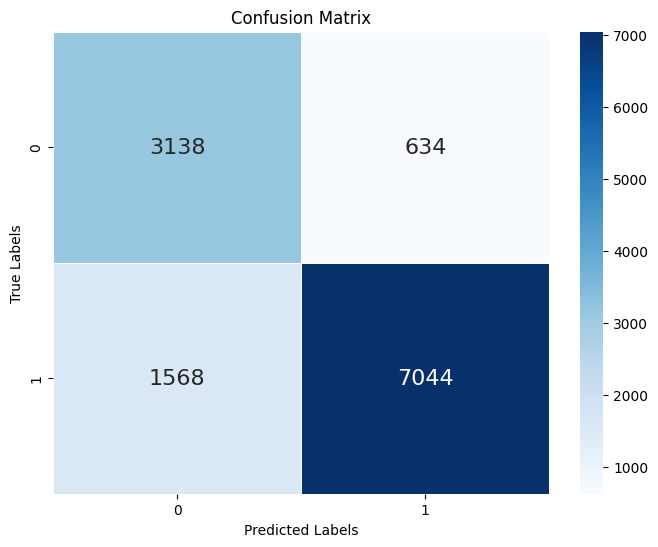

In [46]:
# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### ACCURACY SCORE

In [47]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8221899224806202


#### CLASSICIFATION REPORT

In [48]:
# Generate classification report
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_result)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.83      0.74      3772
           1       0.92      0.82      0.86      8612

    accuracy                           0.82     12384
   macro avg       0.79      0.82      0.80     12384
weighted avg       0.84      0.82      0.83     12384



### MAKING PREDICTIONS

In [49]:
X_train_scaled.dtypes

gender_Female                      float64
gender_Male                        float64
customer_type_Loyal Customer       float64
customer_type_disloyal Customer    float64
type_of_travel_Business travel     float64
type_of_travel_Personal Travel     float64
index                              float64
age                                float64
flight_distance                    float64
online_boarding                    float64
dtype: object

In [50]:
# Assuming your DataFrame is named df
unique_values_per_column = {col: X_train_scaled[col].unique() for col in X_train_scaled.columns}

# Print unique values for each column
for col, values in unique_values_per_column.items():
    print(f"Unique values in column '{col}': {values}")

Unique values in column 'gender_Female': [-1.01025396  0.98985012]
Unique values in column 'gender_Male': [ 1.01025396 -0.98985012]
Unique values in column 'customer_type_Loyal Customer': [-2.06444079  0.48439268]
Unique values in column 'customer_type_disloyal Customer': [ 2.06444079 -0.48439268]
Unique values in column 'type_of_travel_Business travel': [ 0.26373746 -3.79164948]
Unique values in column 'type_of_travel_Personal Travel': [-0.26373746  3.79164948]
Unique values in column 'index': [-0.30454876  1.24469696  0.69360158 ...  0.72530723 -0.3949276
  0.54502014]
Unique values in column 'age': [-0.50915514  0.99055963  0.84304968  0.39754157 -0.66268827  0.32282678
 -0.43267548 -0.12853992 -2.00785321  0.76911507 -1.76391209  1.21096142
 -0.89451937 -0.58582405  0.62087397 -0.97223367  0.17297194 -0.73975425
 -1.20680641 -0.81702884  3.22654723 -0.05292699 -2.17265586  0.02252658
  0.47211898  0.69505737 -1.12836781 -0.28026141  0.24797137 -1.05018014
 -1.92613288  1.72149462  

In [51]:
random_row = X_test.sample()
random_row

,gender_Female,gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,index,age,flight_distance,online_boarding
28876,1,0,1,0,1,0,60765,49,826,4


In [52]:
input_values = [0, 1, 0, 0, 1, 1, 0, 70,1000, 1]

# Create the array
customer_input = np.array(input_values)

In [53]:
predicted_class = model.predict(customer_input.reshape(1, -1))
predicted_class

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [54]:
# Initialize an empty list to store user input
input_values = []

# Collect user input for each feature
gender_female = int(input("Enter gender_Female (0 or 1): "))
gender_male = int(input("Enter gender_Male (0 or 1): "))
customer_type_loyal = int(input("Enter customer_type_Loyal Customer (0 or 1): "))
customer_type_disloyal = int(input("Enter customer_type_disloyal Customer (0 or 1): "))
type_of_travel_business = int(input("Enter type_of_travel_Business travel (0 or 1): "))
type_of_travel_personal = int(input("Enter type_of_travel_Personal Travel (0 or 1): "))
index = int(input("Enter index (integer): "))
age = int(input("Enter age: "))
flight_distance = float(input("Enter flight_distance: "))
online_boarding = int(input("Enter online_boarding (integer): "))

# Append the user inputs to the list
input_values.extend([gender_female, gender_male, customer_type_loyal, customer_type_disloyal,
                     type_of_travel_business, type_of_travel_personal, index, age,
                     flight_distance, online_boarding])

# Print the array with commas
input_values_str = ', '.join(map(str, input_values))
print("Input values:", input_values_str)

# Convert the list to a NumPy array and reshape
input_array = np.array(input_values).reshape(1, -1)

# Make predictions using the trained model
prediction = model.predict(input_array)

# Print the predicted class
print("Predicted Class:", prediction)


KeyboardInterrupt: Interrupted by user